In [95]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [96]:
data = pd.read_csv('logistic_regression_model_data.csv')

In [97]:
data.head()

,Age,Educational_level,Screening_time,health_problems,Irregular_eating_habits,hobby_hours,increased_sleep_hours,social_media_hours,Exercise,depressiveness,anxiety_interference,overthinking,concentration_difficulty,online_difficulty_level,focus_level
0,16 to 18 years,Higher Secondary School,3 to 4 hours,Yes,Yes,1,4,4,Sometimes,Never,Yes,May be,1,1,5
1,16 to 18 years,Higher Secondary School,2 to 3 hours,Yes,Yes,1,2,3,Rarely,Occasionally,Maybe,Yes,5,4,5
2,16 to 18 years,Higher Secondary School,4 to 5 hours,Yes,Yes,0,2,2,Sometimes,Occasionally,Yes,Yes,4,5,3
3,16 to 18 years,Higher Secondary School,4 to 5 hours,No,No,1,2,2,Rarely,Never,No,No,2,3,3
4,16 to 18 years,Higher Secondary School,4 to 5 hours,Yes,Yes,2,2,1,Rarely,Occasionally,No,Yes,3,3,3


In [98]:
data.shape

(1100, 15)

In [99]:
#check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                           --------------  ----- 
 0   Age                                                                                                                                              1100 non-null   object
 1   Educational_level                                                                                                                                1100 non-null   object
 2   Screening_time                                                                                                                                   1100 non-null   object
 3   health_problems        

In [100]:
#check description
data.describe()

,hobby_hours,increased_sleep_hours,social_media_hours,concentration_difficulty,online_difficulty_level,focus_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.958182,1.891818,2.385455,3.590909,3.200000,3.620909
std,0.776167,1.266969,1.112657,1.077484,1.090116,1.081282
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,2.000000,3.000000,2.000000,3.000000
50%,1.000000,2.000000,2.000000,4.000000,3.000000,4.000000
75%,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000
max,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000


In [101]:
#check description
data.describe(include='all')

,Age,Educational_level,Screening_time,health_problems,Irregular_eating_habits,hobby_hours,increased_sleep_hours,social_media_hours,Exercise,depressiveness,anxiety_interference,overthinking,concentration_difficulty,online_difficulty_level,focus_level
count,1100,1100,1100,1075,1100,1100.000000,1100.000000,1100.000000,1100,1100,1100,1100,1100.000000,1100.000000,1100.000000
unique,4,4,4,2,3,NaN,NaN,NaN,4,4,3,3,NaN,NaN,NaN
top,18 to 22 years,Under Graduate,4 to 5 hours,No,No,NaN,NaN,NaN,Sometimes,Occasionally,Yes,Yes,NaN,NaN,NaN
freq,355,361,326,578,562,NaN,NaN,NaN,428,478,484,562,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.958182,1.891818,2.385455,NaN,NaN,NaN,NaN,3.590909,3.200000,3.620909
std,NaN,NaN,NaN,NaN,NaN,0.776167,1.266969,1.112657,NaN,NaN,NaN,NaN,1.077484,1.090116,1.081282
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,4.000000,3.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000


In [102]:
#check null values
data.isnull().sum()

Age                                                                                                                                                 0
Educational_level                                                                                                                                   0
Screening_time                                                                                                                                      0
health_problems                                                                                                                                    25
Irregular_eating_habits                                                                                                                             0
hobby_hours                                                                                                                                         0
increased_sleep_hours                                                                               

In [103]:
df1=data.fillna(0)

In [104]:
df1.isnull().sum()

Age                                                                                                                                                0
Educational_level                                                                                                                                  0
Screening_time                                                                                                                                     0
health_problems                                                                                                                                    0
Irregular_eating_habits                                                                                                                            0
hobby_hours                                                                                                                                        0
increased_sleep_hours                                                                                     

In [105]:
df1.to_csv('finalmodel.csv',index=False)

In [106]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6C70-2416

 Directory of C:\Users\Admin

29-04-2022  11:26    <DIR>          .
11-01-2022  12:40    <DIR>          ..
23-04-2022  15:10    <DIR>          .android
07-08-2020  17:53    <DIR>          .AndroidStudio4.0
26-02-2021  14:09    <DIR>          .atom
02-09-2021  17:21             2,781 .bash_history
22-07-2021  11:29    <DIR>          .cache
21-09-2020  14:55    <DIR>          .conda
21-09-2020  14:44                43 .condarc
09-10-2021  23:32    <DIR>          .config
14-09-2020  15:54                16 .emulator_console_auth_token
12-03-2022  16:31                60 .gitconfig
14-09-2020  16:52    <DIR>          .gradle
20-07-2020  17:46    <DIR>          .idea
13-02-2021  11:49    <DIR>          .idlerc
29-04-2022  10:05    <DIR>          .ipynb_checkpoints
21-09-2020  14:45    <DIR>          .ipython
03-08-2020  19:29    <DIR>          .jdks
26-06-2021  22:27    <DIR>          .jupyter
26-09-2021  11:26    <DIR>          .

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [109]:
pd.get_dummies(data['health_problems'].head())

,No,Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [110]:
encoder_df=pd.get_dummies(data['health_problems'],drop_first=True)
encoder_df.head()

,Yes
0,1
1,1
2,1
3,0
4,1


In [111]:
final_df = data.join(encoder_df)

In [112]:
print(final_df)

                 Age        Educational_level Screening_time health_problems  \
0     16 to 18 years  Higher Secondary School   3 to 4 hours             Yes   
1     16 to 18 years  Higher Secondary School   2 to 3 hours             Yes   
2     16 to 18 years  Higher Secondary School   4 to 5 hours             Yes   
3     16 to 18 years  Higher Secondary School   4 to 5 hours              No   
4     16 to 18 years  Higher Secondary School   4 to 5 hours             Yes   
...              ...                      ...            ...             ...   
1095  18 to 22 years           Under Graduate   4 to 5 hours              No   
1096  13 to 15 years         Secondary School   2 to 3 hours              No   
1097  23 to 26 years            Post Graduate   5 to 6 hours              No   
1098  23 to 26 years            Post Graduate   5 to 6 hours             Yes   
1099  23 to 26 years            Post Graduate   5 to 6 hours              No   

     Irregular_eating_habits  hobby_hou

In [113]:
#drop 'health_problems' column
final_df.drop('health_problems', axis=1, inplace=True)
print(final_df)

                 Age        Educational_level Screening_time  \
0     16 to 18 years  Higher Secondary School   3 to 4 hours   
1     16 to 18 years  Higher Secondary School   2 to 3 hours   
2     16 to 18 years  Higher Secondary School   4 to 5 hours   
3     16 to 18 years  Higher Secondary School   4 to 5 hours   
4     16 to 18 years  Higher Secondary School   4 to 5 hours   
...              ...                      ...            ...   
1095  18 to 22 years           Under Graduate   4 to 5 hours   
1096  13 to 15 years         Secondary School   2 to 3 hours   
1097  23 to 26 years            Post Graduate   5 to 6 hours   
1098  23 to 26 years            Post Graduate   5 to 6 hours   
1099  23 to 26 years            Post Graduate   5 to 6 hours   

     Irregular_eating_habits  hobby_hours  \
0                        Yes            1   
1                        Yes            1   
2                        Yes            0   
3                         No            1   
4     

In [114]:
#renaming columns
final_df.columns = ['Age', 'Educational_level', 'Screening_time', 'Irregular_eating_habits', 'hobby_hours', 'increased_sleeping_hours', 'social_media_hours', 'Exercise', 'depressiveness', 'anxiety_interference', 'overthinking', 'concentration_difficulty', 'online_difficulty_level', 'focus_level', 'health_problems']

#view final df
print(final_df)

                 Age        Educational_level Screening_time  \
0     16 to 18 years  Higher Secondary School   3 to 4 hours   
1     16 to 18 years  Higher Secondary School   2 to 3 hours   
2     16 to 18 years  Higher Secondary School   4 to 5 hours   
3     16 to 18 years  Higher Secondary School   4 to 5 hours   
4     16 to 18 years  Higher Secondary School   4 to 5 hours   
...              ...                      ...            ...   
1095  18 to 22 years           Under Graduate   4 to 5 hours   
1096  13 to 15 years         Secondary School   2 to 3 hours   
1097  23 to 26 years            Post Graduate   5 to 6 hours   
1098  23 to 26 years            Post Graduate   5 to 6 hours   
1099  23 to 26 years            Post Graduate   5 to 6 hours   

     Irregular_eating_habits  hobby_hours  increased_sleeping_hours  \
0                        Yes            1                         4   
1                        Yes            1                         2   
2                 

In [115]:
final_df['Educational_level']= data['Educational_level'].map({'Secondary School':0,'Higher Secondary School':1,'Under Graduate':2,'Post Graduate':3})

final_df['Age']=data['Age'].map({'13 to 15 years':0, '16 to 18 years':1, '18 to 22 years':2, '23 to 26 years':3})

final_df['Screening_time']=data['Screening_time'].map({'2 to 3 hours':0, '3 to 4 hours':1, '4 to 5 hours':2, '5 to 6 hours':3})

final_df['Irregular_eating_habits']=data['Irregular_eating_habits'].map({'No':0,'Yes':1,'May be':2})

final_df['Exercise']=data['Exercise'].map({'Never':0, 'Rarely':1, 'Sometimes':2, 'Always':3})

final_df['depressiveness']=data['depressiveness'].map({'Never':0, 'Rarely':1, 'Occasionally':2, 'All the time':3})

final_df['anxiety_interference']=data['anxiety_interference'].map({'No':0,'Yes':1,'Maybe':2})

final_df['overthinking']=data['overthinking'].map({'No':0,'Yes':1,'May be':2})


In [116]:
final_df.head()

,Age,Educational_level,Screening_time,Irregular_eating_habits,hobby_hours,increased_sleeping_hours,social_media_hours,Exercise,depressiveness,anxiety_interference,overthinking,concentration_difficulty,online_difficulty_level,focus_level,health_problems
0,1,1,1,1,1,4,4,2,0,1,2,1,1,5,1
1,1,1,0,1,1,2,3,1,2,2,1,5,4,5,1
2,1,1,2,1,0,2,2,2,2,1,1,4,5,3,1
3,1,1,2,0,1,2,2,1,0,0,0,2,3,3,0
4,1,1,2,1,2,2,1,1,2,0,1,3,3,3,1


# separate independent and dependent features


In [117]:
x = final_df.drop('health_problems',axis=1)
y = final_df['health_problems']

In [118]:
x.head(2)

,Age,Educational_level,Screening_time,Irregular_eating_habits,hobby_hours,increased_sleeping_hours,social_media_hours,Exercise,depressiveness,anxiety_interference,overthinking,concentration_difficulty,online_difficulty_level,focus_level
0,1,1,1,1,1,4,4,2,0,1,2,1,1,5
1,1,1,0,1,1,2,3,1,2,2,1,5,4,5


In [119]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1095    0
1096    0
1097    0
1098    1
1099    0
Name: health_problems, Length: 1100, dtype: uint8

# Feature Engineering

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [121]:
#Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=14)
ordered_feature=ordered_rank_features.fit(x,y)

In [122]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns = ["health_problems"])
dfcolumns=pd.DataFrame(x.columns)

In [123]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [124]:
features_rank

,0,health_problems
0,Age,38.624972
1,Educational_level,40.724851
2,Screening_time,43.391514
3,Irregular_eating_habits,219.384983
4,hobby_hours,42.407008
5,increased_sleeping_hours,63.024771
6,social_media_hours,17.102861
7,Exercise,57.230739
8,depressiveness,0.001571
9,anxiety_interference,2.488937


In [125]:
features_rank.nlargest(14,'health_problems')

,0,health_problems
3,Irregular_eating_habits,219.384983
5,increased_sleeping_hours,63.024771
7,Exercise,57.230739
2,Screening_time,43.391514
4,hobby_hours,42.407008
1,Educational_level,40.724851
0,Age,38.624972
10,overthinking,30.643615
6,social_media_hours,17.102861
13,focus_level,3.948066


# Feature Importance

In [126]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [127]:
print(model.feature_importances_)
#This technique gives you a score for each feature of your data, the higher the score more relevant it will be .

[0.03279583 0.02928271 0.03600283 0.29851619 0.04199241 0.05063906
 0.08713514 0.09913526 0.06207796 0.04310165 0.05895256 0.05677393
 0.05581584 0.04777862]


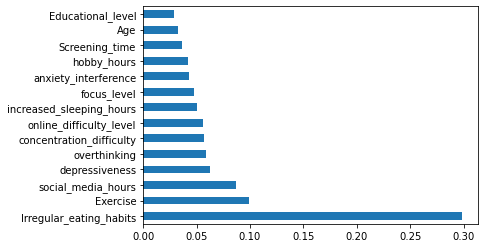

In [128]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(14).plot(kind='barh')

In [129]:
final_df.corr()

,Age,Educational_level,Screening_time,Irregular_eating_habits,hobby_hours,increased_sleeping_hours,social_media_hours,Exercise,depressiveness,anxiety_interference,overthinking,concentration_difficulty,online_difficulty_level,focus_level,health_problems
Age,1.000000,0.990910,0.942445,0.287309,-0.810054,-0.872236,-0.465106,-0.043166,-0.077052,-0.019313,0.172368,0.413106,0.117638,0.424853,0.219973
Educational_level,0.990910,1.000000,0.951342,0.295803,-0.796335,-0.871524,-0.466498,-0.037606,-0.076925,-0.015599,0.159861,0.402548,0.109709,0.404957,0.223023
Screening_time,0.942445,0.951342,1.000000,0.276676,-0.784416,-0.837244,-0.435066,-0.027278,-0.078059,-0.037018,0.136313,0.413807,0.102676,0.349420,0.222121
Irregular_eating_habits,0.287309,0.295803,0.276676,1.000000,-0.334045,-0.275755,-0.004970,-0.345262,0.012160,0.018954,0.212677,0.117452,0.142965,0.132529,0.512206
hobby_hours,-0.810054,-0.796335,-0.784416,-0.334045,1.000000,0.778197,0.391665,0.114401,0.057602,-0.039672,-0.211386,-0.366464,-0.158946,-0.369102,-0.247736
increased_sleeping_hours,-0.872236,-0.871524,-0.837244,-0.275755,0.778197,1.000000,0.419470,0.036357,0.100587,-0.011772,-0.177830,-0.403710,-0.051519,-0.388630,-0.259974
social_media_hours,-0.465106,-0.466498,-0.435066,-0.004970,0.391665,0.419470,1.000000,-0.074793,0.004888,0.074109,-0.015433,-0.216723,-0.133383,-0.218019,0.173165
Exercise,-0.043166,-0.037606,-0.027278,-0.345262,0.114401,0.036357,-0.074793,1.000000,-0.123529,-0.010443,-0.323161,-0.047309,-0.129501,-0.105904,-0.319802
depressiveness,-0.077052,-0.076925,-0.078059,0.012160,0.057602,0.100587,0.004888,-0.123529,1.000000,0.169779,0.059452,0.091822,0.294892,0.057593,0.001692
anxiety_interference,-0.019313,-0.015599,-0.037018,0.018954,-0.039672,-0.011772,0.074109,-0.010443,0.169779,1.000000,0.155755,-0.011795,0.029885,-0.046020,-0.064038


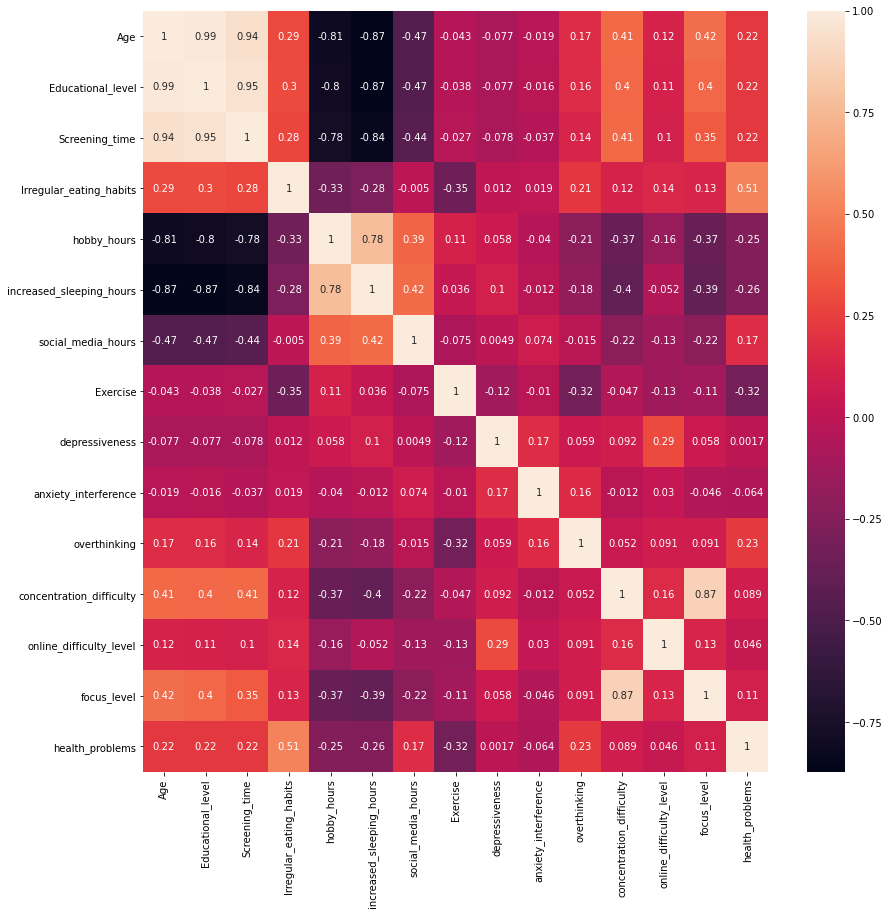

In [130]:
import seaborn as sns
corr=final_df.corr()
top_features=corr.index
plt.figure(figsize=(14,14))
sns.heatmap(final_df[top_features].corr(),annot=True)

# Information Gain

In [131]:
from sklearn.feature_selection import mutual_info_classif

In [132]:
mutual_info=mutual_info_classif(x,y)
#tells which features are more correlated to our dependent feature

In [133]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

Irregular_eating_habits     0.265413
Exercise                    0.068491
hobby_hours                 0.057484
increased_sleeping_hours    0.042230
social_media_hours          0.038330
Screening_time              0.030450
Educational_level           0.029866
Age                         0.029539
overthinking                0.022198
concentration_difficulty    0.014037
online_difficulty_level     0.011480
focus_level                 0.001684
anxiety_interference        0.000000
depressiveness              0.000000
dtype: float64

# split the data into training and testing 

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [135]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(825, 14) (825,)
(275, 14) (275,)


In [136]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [137]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
#prediction
tr_predict = lr_model.predict(x_train)
ts_predict = lr_model.predict(x_test)

In [138]:
#check accuracy scpre
print('Training Accuracy:',accuracy_score(y_train,tr_predict))
print('Testing Accuracy:',accuracy_score(y_test,ts_predict))

Training Accuracy: 0.793939393939394
Testing Accuracy: 0.8218181818181818


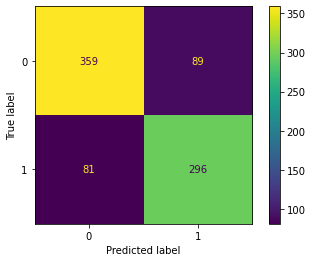

In [139]:
plot_confusion_matrix(lr_model,x_train,y_train,values_format='d')

In [140]:
from sklearn import metrics

In [141]:
cnf_matrix=metrics.confusion_matrix(y_test,ts_predict)
cnf_matrix

array([[129,  26],
       [ 23,  97]], dtype=int64)

In [142]:
print("Accuracy:",metrics.accuracy_score(y_test,ts_predict))
print("Precision:",metrics.precision_score(y_test,ts_predict))
print("Recall:",metrics.recall_score(y_test,ts_predict))

Accuracy: 0.8218181818181818
Precision: 0.7886178861788617
Recall: 0.8083333333333333


# Plotting AUC curve

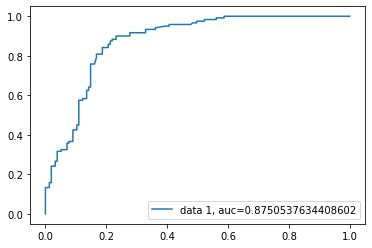

In [143]:
y_pred_proba = lr_model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()